# **Evidencia de aprendizaje 1: Creación de una base de datos análiticas**

#### Trabajo realizado por: Juan David Ramírez García
#### Universidad: IUDigital del Antioquia

## 1. Problema y dataset

**Para quién**: El grupo de investigadores de la fundación Una vida mejor esta buscando apoyar iniciativas y nuevos tratamientos contra la lucha del cancer. Para esto, requiere hacer seguimiento a pacientes diagnosticados con cancer de pulmón y su evolución bajo esos tratamientos. Por lo cual este **dataset** podría ser un buen punto de partida para dar inicio a esta iniciativa.

**Problemática**: El cancer de pulmón es la principal causa de muerte por cancer del mundo, con más diagnósticos y personas fallecidas anualmente. Afecta principalmente a poblaciones vulnerales como los fumadores, ex fumadores, diabéticos y personas mayores de 70 años. Asimismo, como familiares de enfermos y los sistemas de salud que tienen una gran carga financiera en la lucha contra la enfermedad.Por lo tanto, la creación y organización de este dataset como una base de de datos análitica, tiene como potencial ser un proyecto de análisis de datos para encontrar factores y tedencias que puedan ayudar a detectar esta enfermedad en una fase temprana, ya que su detención tardía es la causa fundamental de su mortalidad.

**Dataset**: Mi motivo de escoger este dataset es que he tenido la oportunidad de trabajar con menores de edad diágnosticados con cancer en proyectos educativos. Entonces trabajar sobre estos datos es una forma de capacitarme y entender más sobre esta enfermedad desde otra perspectiva. En este casos desde los datos.

Este es el link kagle para acceder a más información del data set: https://www.kaggle.com/datasets/khwaishsaxena/lung-cancer-dataset/data

Variables relevantes encontrada en el dataset:

* id: Identificador único de cada paciente.
* age: La edad de los pacientes en el momento que fueron diganosticados.
* gender: Genero de los pacientes. Ejemplo male y female.
* country: País donde vive el paciente.
* diagnosis_date: Fecha en la cual el paciente fue diganosticado con cancer de pulmón.
* cancer_stage: Fase en la que se encuentra el cancer al momento del diagnostico. Ejemplo Stage I, Stage II, Stage III, Stage IV.
* family_history: Indica si hay historrial de cancer en la familia. Ejemplo yes y no.
* smoking_status: Indica si el paciente es funmador.Ejemplo current smoker, former smoker, never smoked, passive smoker.
* bmi: Indice de masa corporal del paciente cuando fue diagnosticado.
* cholesterol_level: Indica el valor del nivel del colesterol del paciente.
* hypertension: Indica si el paciente tiene hipertensión alta. Ejemplo yes, no.
* asthma: Indicata si el paciente tiene asma.Ejemplo yes, no.
* cirrhosis: Indica si el paciente tiene cirrosis en el hígado.Ejemplo yes, no.
* other_cancer: Indica si el paciente tiene otro tipo de cancer además del diganostico de pulmon Ejemplo yes, no.
* treatment_type: El tipo de tratamiento que el paciente ha recivido. Ejemplo surgery, chemotherapy, radiation, combined.
* end_treatment_date: La fecha en el que el paciente ha terminado su tratamiento o ha muerto.
* survived: Indica si el paciente sobrevivio. Ejemplo yes, no.





## 2.Modelo entidad-relación

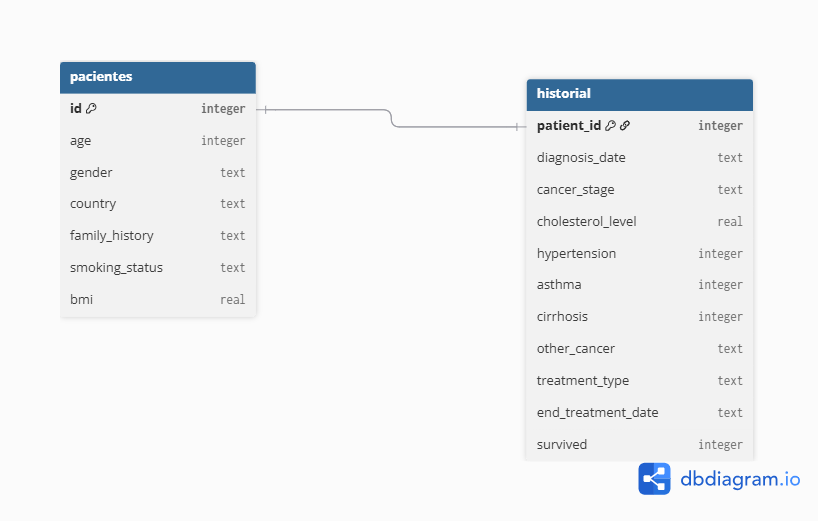

In [15]:

from IPython.display import Image

# Use the path to the new PNG file you just created
image_path = "/workspaces/Bigdata_2025-2/docs/Entidad-relacion.png"


# This will display the diagram directly in the cell's output
Image(filename=image_path)

El diagrama muestra la relación entre las tablas pacientes y historial. La tabla pacientes almacena información personal como edad, género, país, antecedentes familiares, estado de fumador y nivel de masa corporal. La tabla historial guarda datos médicos como fecha de diagnóstico, etapa del cáncer, niveles de colesterol, presencia de enfermedades y tipo de tratamiento. Ambas tablas están conectadas por el campo id del paciente, lo que permite vincular los datos personales con su historial clínico.

#### Importando e instalando librerías necesarias para la realización de la evidencia de aprendizaje

In [16]:
#Libreria
import pandas as pd
import sqlite3

## 3. Creación DB + Carga de datos

#### Script para cargar base de datos desde Kaggle

In [17]:
#Cargando dataset cancer de pulmon
df=pd.read_csv("/workspaces/Bigdata_2025-2/src/bigdata/static/csv/Lung Cancer.csv")
df.head(5)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [18]:
# Dividiendo dataframe en dos nuevos dataframes

pacientes = df[['id', 'age', 'gender', 'country', 'family_history', 'smoking_status', 'bmi']].drop_duplicates()
historial = df[['id', 'diagnosis_date', 'cancer_stage', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer',
                     'treatment_type', 'end_treatment_date', 'survived']].copy()
historial.rename(columns={'id': 'patient_id'}, inplace=True)



In [19]:
# nuevo dataframe paciente
pacientes.head(5)

,id,age,gender,country,family_history,smoking_status,bmi
0,1,64.0,Male,Sweden,Yes,Passive Smoker,29.4
1,2,50.0,Female,Netherlands,Yes,Passive Smoker,41.2
2,3,65.0,Female,Hungary,Yes,Former Smoker,44.0
3,4,51.0,Female,Belgium,No,Passive Smoker,43.0
4,5,37.0,Male,Luxembourg,No,Passive Smoker,19.7


In [20]:
#Nuevo dataframe historial
historial.head()

,patient_id,diagnosis_date,cancer_stage,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,2016-04-05,Stage I,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,2023-04-20,Stage III,280,1,1,0,0,Surgery,2024-06-17,1
2,3,2023-04-05,Stage III,268,1,1,0,0,Combined,2024-04-09,0
3,4,2016-02-05,Stage I,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,2023-11-29,Stage I,178,0,0,0,0,Combined,2025-01-08,0


## Creación base de datos cancer_db

In [21]:
#CReacion Cancer.db con sus respectivas tablas y carga de datos

# Conectar a SQLite
conn = sqlite3.connect("cancer_db.db")
cursor = conn.cursor()

# Creación de tablas
cursor.execute("""
CREATE TABLE IF NOT EXISTS pacientes (
    id INTEGER PRIMARY KEY,
    age INTEGER,
    gender TEXT,
    country TEXT,
    family_history TEXT,
    smoking_status TEXT,
    bmi REAL
)
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS historial (
    record_id INTEGER PRIMARY KEY AUTOINCREMENT,
    patient_id INTEGER,
    diagnosis_date TEXT,
    cancer_stage TEXT,
    cholesterol_level REAL,
    hypertension INTEGER,
    asthma INTEGER,
    cirrhosis INTEGER,
    other_cancer TEXT,
    treatment_type TEXT,
    end_treatment_date TEXT,
    survived INTEGER,
    FOREIGN KEY(patient_id) REFERENCES patients(id)
)
""")

# Insertar datos de los DataFrames
pacientes.to_sql("pacientes", conn, if_exists="replace", index=False)
historial.to_sql("historial", conn, if_exists="replace", index=False)

# Verificar tablas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

conn.commit()
conn.close()

[('sqlite_sequence',), ('pacientes',), ('historial',)]


## 4. Evidencias con consultas SQL

### Conteo de registros

In [22]:
# Conectar a la base de datos
conn = sqlite3.connect("cancer_db.db")

# query
query = """
SELECT count(*) from pacientes
"""

# Ejecutar el query y guardar el resultado en un DataFrame
df_conteo = pd.read_sql_query(query, conn)
# Cerrar la conexión
conn.close()
df_conteo.head(5)

,count(*)
0,890000


Podemos evidenciar que tenemos el registro de 890000 pacientes diagnosticados con cancer de pulmon y sus respectivos datos demograficos.

In [23]:
# Conectar a la base de datos
conn = sqlite3.connect("cancer_db.db")

# query
query = """
SELECT count(*) from historial
"""

# Ejecutar el query y guardar el resultado en un DataFrame
df_conteo = pd.read_sql_query(query, conn)
# Cerrar la conexión
conn.close()
df_conteo.head(5)

,count(*)
0,890000


Encontramos 890000 registros del  historial de pacientes diagnosticados con cancer de pulmon.

### Nombres y tipos de columnas

In [24]:
# Conectar a la base de datos
conn = sqlite3.connect("cancer_db.db")

# query
query = """
PRAGMA table_info(pacientes);
"""

# Ejecutar el query y guardar el resultado en un DataFrame
df_descripcion = pd.read_sql_query(query, conn)
# Cerrar la conexión
conn.close()
df_descripcion.head(5)

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,0
1,1,age,REAL,0,None,0
2,2,gender,TEXT,0,None,0
3,3,country,TEXT,0,None,0
4,4,family_history,TEXT,0,None,0


Esta consulta permite ver los tipos de las columnas de la tabla pacientes como: su edad, genero, hsitorial familiar y índice de masa corporal.

In [25]:
# Conectar a la base de datos
conn = sqlite3.connect("cancer_db.db")

# query
query = """
PRAGMA table_info(historial);
"""

# Ejecutar el query y guardar el resultado en un DataFrame
df_descripcion = pd.read_sql_query(query, conn)
# Cerrar la conexión
conn.close()
df_descripcion.head(5)

,cid,name,type,notnull,dflt_value,pk
0,0,patient_id,INTEGER,0,None,0
1,1,diagnosis_date,TEXT,0,None,0
2,2,cancer_stage,TEXT,0,None,0
3,3,cholesterol_level,INTEGER,0,None,0
4,4,hypertension,INTEGER,0,None,0


Se puede apreciar el nombre variables que hablan del historial médico de pacientes diagnosticados con cancer del pulmon, como la fase del cancer, si ha tenido colesterol, o ha sifo fumador y si el paciente sobrevivió a la enfermedad.

## Consulta con filtro

In [26]:
# Conectar a la base de datos
conn = sqlite3.connect("cancer_db.db")

# query
query = """
SELECT * FROM pacientes WHERE smoking_status = 'Passive Smoker'
"""

# Ejecutar el query y guardar el resultado en un DataFrame
df_filtro = pd.read_sql_query(query, conn)
# Cerrar la conexión
conn.close()
df_filtro.head(5)

,id,age,gender,country,family_history,smoking_status,bmi
0,1,64.0,Male,Sweden,Yes,Passive Smoker,29.4
1,2,50.0,Female,Netherlands,Yes,Passive Smoker,41.2
2,4,51.0,Female,Belgium,No,Passive Smoker,43.0
3,5,37.0,Male,Luxembourg,No,Passive Smoker,19.7
4,7,49.0,Female,Croatia,Yes,Passive Smoker,43.1


Se consulto solo los datos de pacientes que han sido fumadores pasivos.

In [27]:
# Conectar a la base de datos
conn = sqlite3.connect("cancer_db.db")

# query
query = """
SELECT * FROM historial WHERE survived = '1'
"""

# Ejecutar el query y guardar el resultado en un DataFrame
df_filtro = pd.read_sql_query(query, conn)
# Cerrar la conexión
conn.close()
df_filtro.head(5)

,patient_id,diagnosis_date,cancer_stage,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,2,2023-04-20,Stage III,280,1,1,0,0,Surgery,2024-06-17,1
1,7,2018-05-21,Stage III,259,0,0,0,0,Radiation,2019-05-06,1
2,11,2023-12-24,Stage IV,262,1,1,0,0,Surgery,2024-10-28,1
3,22,2017-05-08,Stage III,232,1,1,0,0,Radiation,2019-05-08,1
4,28,2017-07-29,Stage IV,185,1,1,0,0,Radiation,2018-08-21,1


En esta consulta se busco solo el hsitorial de pacientes que sobrevivieron a algunos de los tratamientos contra el cancer.

## Mirando relación entre ambas tablas

In [28]:
# Conectar a la base de datos
conn = sqlite3.connect("cancer_db.db")

# query
query = """
SELECT p.id, p.age, c.diagnosis_date, c.cancer_stage
FROM pacientes p
JOIN historial c ON p.id = c.patient_id
"""

# Ejecutar el query y guardar el resultado en un DataFrame
df_consulta = pd.read_sql_query(query, conn)
# Cerrar la conexión
conn.close()
df_consulta.head()

,id,age,diagnosis_date,cancer_stage
0,1,64.0,2016-04-05,Stage I
1,2,50.0,2023-04-20,Stage III
2,3,65.0,2023-04-05,Stage III
3,4,51.0,2016-02-05,Stage I
4,5,37.0,2023-11-29,Stage I


En esta consulta se puede evidenciar la selección de información de pacientes que tienen el estado de fumador pasivo. Para ello, se combinan las tablas pacientes y historial mediante el identificador del paciente, mostrando datos personales (como país, género, edad y BMI) junto con información médica (fecha de diagnóstico, etapa del cáncer y si sobrevivió). Finalmente, se limita el resultado a los primeros cinco registros.